In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline


In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
#lets Describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
#information of  dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
#any null values
#not neccessary in above information we can see
df.isnull().values.any()

False

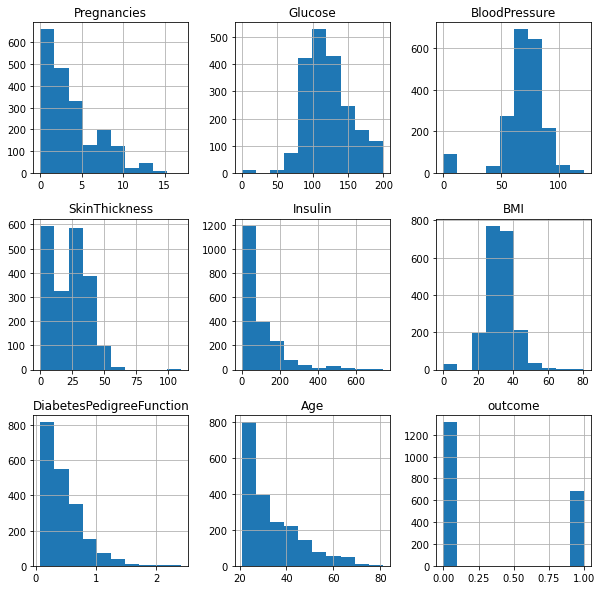

In [18]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot:>

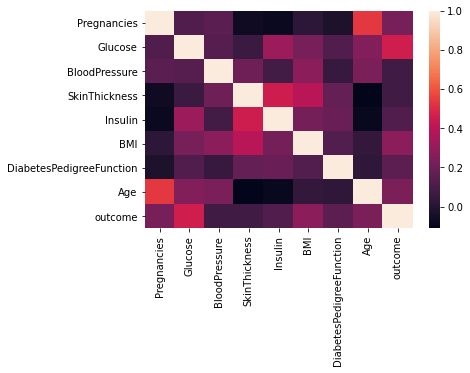

In [7]:
#correlation
sns.heatmap(df.corr())
#we can analyse skin thinkness,insulin, Pregnencies and age are full independent to
#age and pregncies has negative correlation

<AxesSubplot:xlabel='count', ylabel='outcome'>

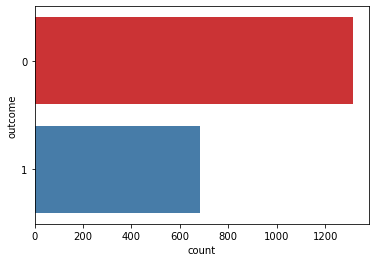

In [8]:
#lets count total outcome in each target 0 1
#0 means no diabetes
#1 means patient with diabetes
sns.countplot(y=df['outcome'],palette='Set1')

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

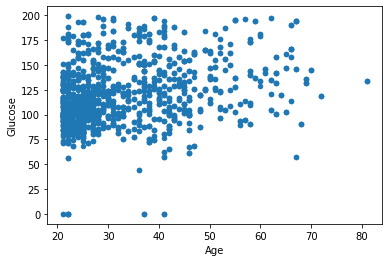

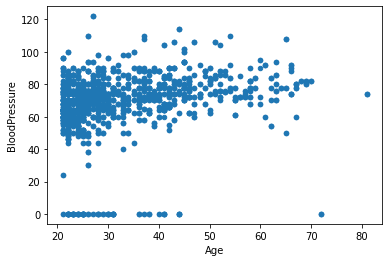

In [9]:
#scatter plot to understand
df.plot(kind='scatter',x='Age',y='Glucose')
df.plot(kind='scatter',x='Age',y='BloodPressure')



In [10]:
X=df.drop(columns=['outcome'])
y=df['outcome']

In [11]:
# Train Test split
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [12]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1600, 8), (400, 8), (1600,), (400,))

In [13]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf=RandomForestClassifier()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
accuracy_score(test_y,y_pred)
acc,roc=[],[]
ac=accuracy_score(test_y,y_pred)
acc.append(ac)
try:
    rc=roc_auc_score(test_y,y_pred)
except ValueError:
    pass
#rc=roc_auc_score(test_y,y_pred)
#rc=accuracy_score(test_y,y_pred)
roc.append(rc)
print("Accuracy {0} ROC {1}".format(ac,rc))

#display predicted
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head(400)

Accuracy 0.9625 ROC 0.9553333333333334


,Actual,Predicted
722,1,1
62,0,0
1488,1,1
1959,0,0
1438,1,1
...,...,...
409,1,1
374,0,0
1770,0,0
1444,0,0


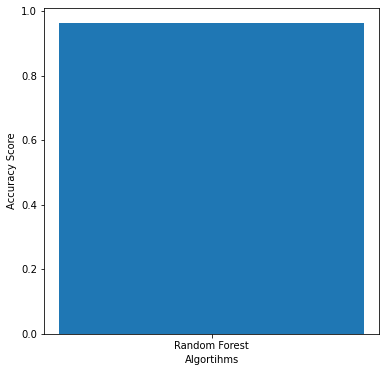

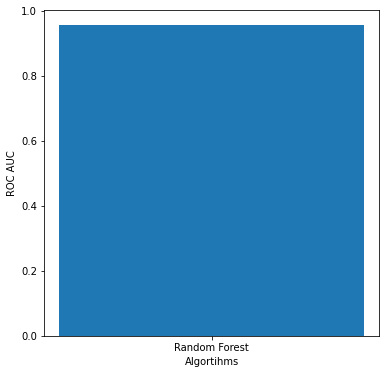

In [14]:
#lets plot the bar graph

ax=plt.figure(figsize=(6,6))
plt.bar(['Random Forest',],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(6,6))
plt.bar(['Random Forest'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()